# PES University, Bangalore
Established under Karnataka Act No. 16 of 2013

## UE22AM343AB4 - Advanced Data Analytics

Designed by Nischal H S

### Student Details
- Name : **Shusrith S**
- SRN : **PES1UG22AM155**

# ADA Worksheet Part D

## Regression

You’ve recently joined as a data scientist at CycleShare Co., a rapidly growing bike-sharing company operating in a bustling urban area. Your role involves analyzing data to help the company optimize operations and enhance customer satisfaction. Your task is to analyze the data collected from the bike-sharing system to understand the factors that influence bike rentals. This analysis will help the company **optimize bike availability, improve customer satisfaction,** and **increase overall efficiency**.

By exploring and visualizing the dataset, you will uncover trends and patterns that can inform strategic decisions, such as:

- **Where to place more bikes**
- **How to adjust pricing**
- **When to perform maintenance**

Ultimately, your goal is to build a **predictive model** that can accurately forecast bike demand, ensuring that the **right number of bikes are available at the right times and locations**.

<img src="bike_sharing_img.jpg" width="800" height="400">


# **Regression**

**Regression** is a statistical method used to model the connection between variables, understanding how changes in one influence another. It’s vital for **predicting outcomes, finding patterns,** and **making informed decisions**. Regression is essential across diverse fields like **economics** and **medicine** due to its ability to **quantify relationships** and make predictions for new data. Its popularity arises from its **simplicity, adaptability,** and its central role in **data-driven decision-making**.

In this worksheet, we will be exploring three concepts, namely:

- **Simple Linear Regression**
- **Multiple Linear Regression**
- **Logistic Regression**

Before we go any further, let’s have a look at the **dataset** and its different **columns**.


In [1]:
!wget https://raw.githubusercontent.com/MBUYt0n/ada/refs/heads/main/ADA_Worksheet_D/bike_sharing_dataset/day.csv

--2024-09-20 16:56:34--  https://raw.githubusercontent.com/MBUYt0n/ada/refs/heads/main/ADA_Worksheet_D/bike_sharing_dataset/day.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57569 (56K) [text/plain]
Saving to: ‘day.csv’

day.csv             100%[===================>]  56.22K  --.-KB/s    in 0.009s  

2024-09-20 16:56:35 (5.93 MB/s) - ‘day.csv’ saved [57569/57569]



In [2]:
# might make it easier to install the packages directly to ipynb kernel for this to work, so please run this
%pip install pandas numpy matplotlib seaborn scikit-learn

In [3]:
# 1. Load the bike sharing dataset

import pandas as pd

df = pd.read_csv('day.csv')

In [4]:
# 2. Explore the dataset

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


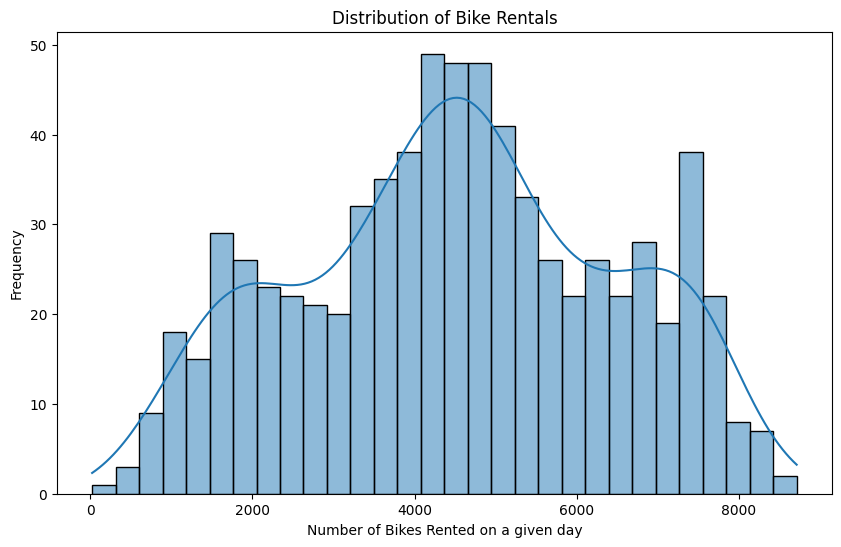

In [7]:
# 3. Visualize the dataset

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of the target variable 'cnt'
plt.figure(figsize=(10, 6))
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title('Distribution of Bike Rentals')
plt.xlabel('Number of Bikes Rented on a given day')
plt.ylabel('Frequency')
plt.show()

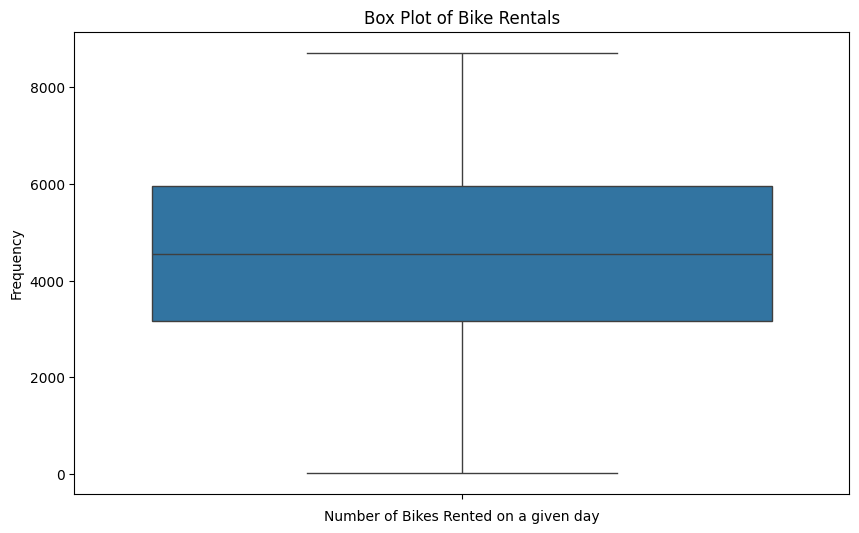

In [8]:
# plot the spread of the target variable 'cnt'
plt.figure(figsize=(10, 6))
sns.boxplot(df['cnt'])
plt.title('Box Plot of Bike Rentals')
plt.xlabel('Number of Bikes Rented on a given day')
plt.ylabel('Frequency')
plt.show()

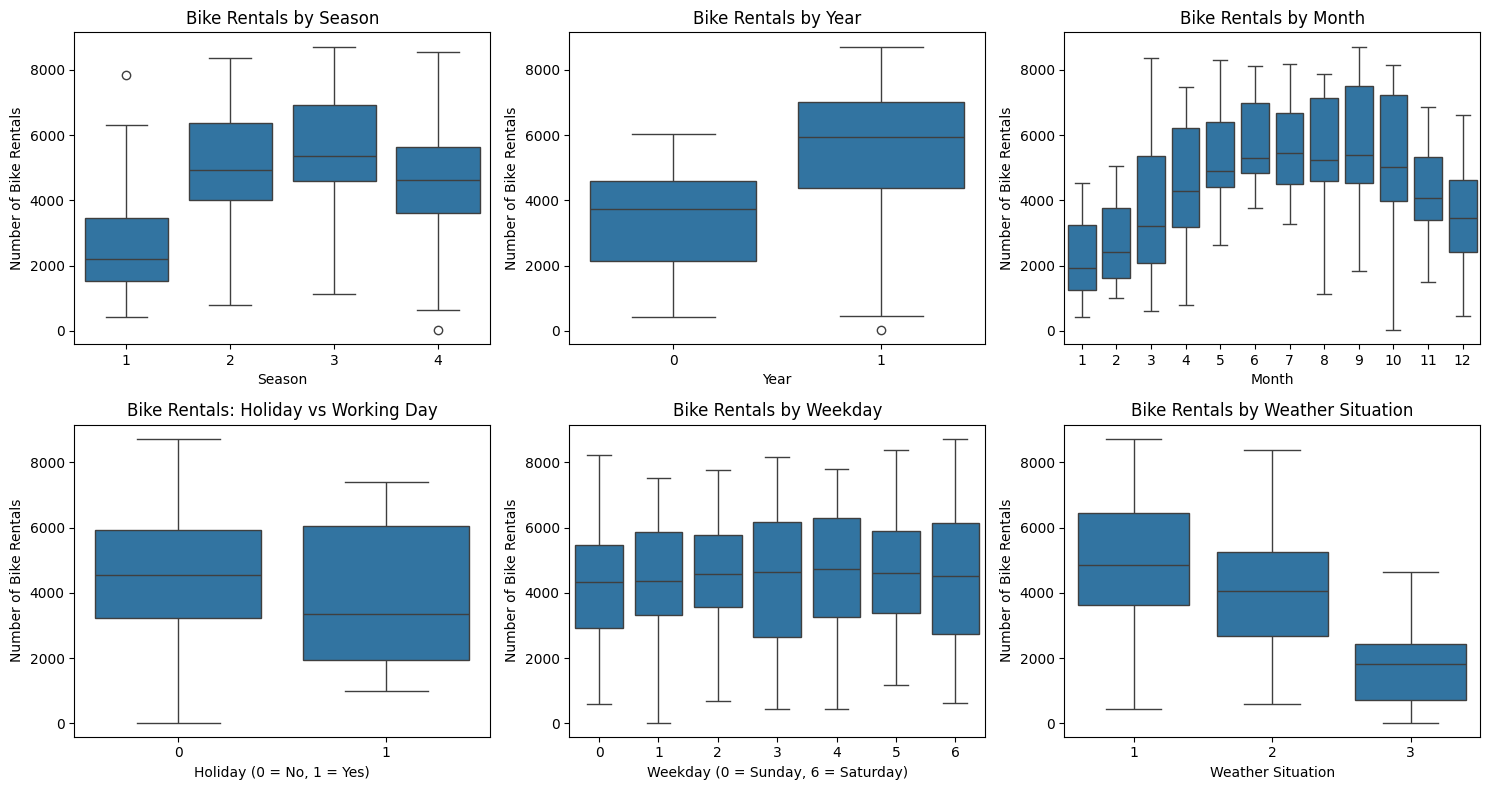

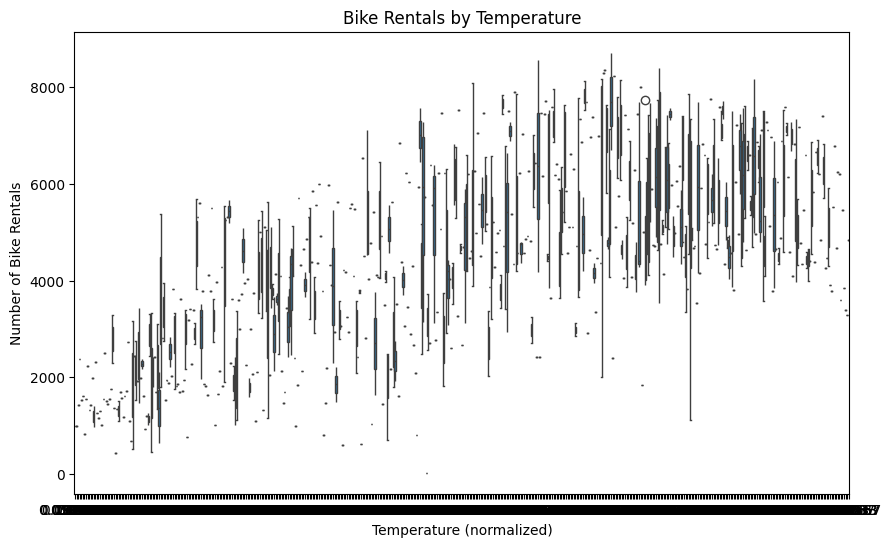

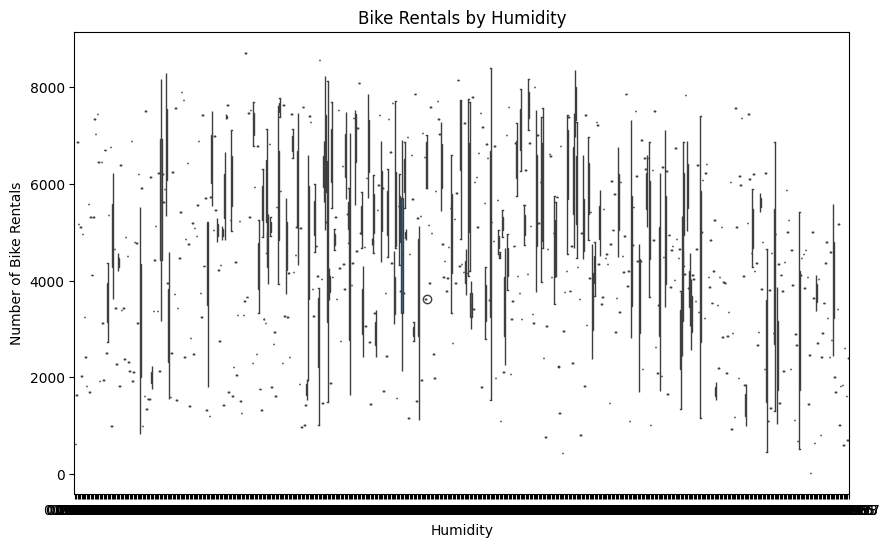

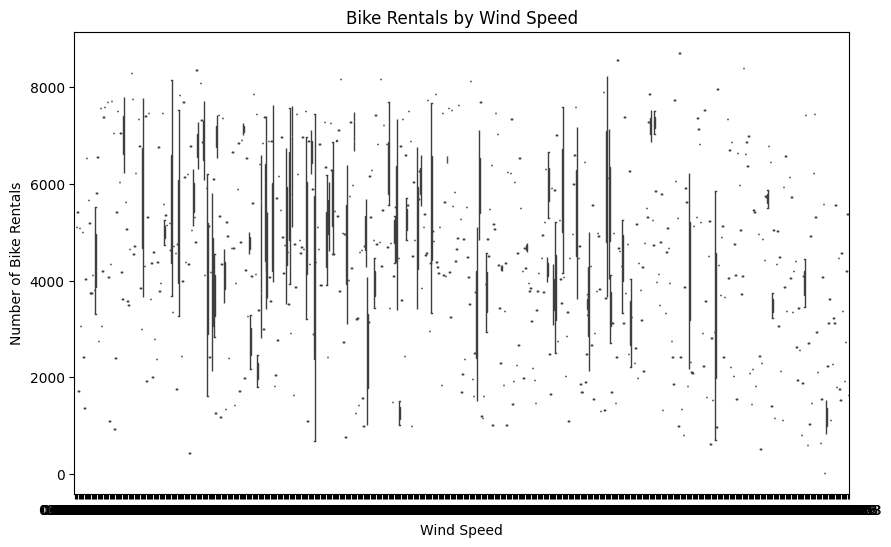

In [9]:
# Visualising how the registrations varies for different parameters

import matplotlib.pyplot as plt
import seaborn as sns

# Setting the plot size for better visibility
plt.figure(figsize=(15, 8))

# 1. Boxplot of Bike Rentals by Season
plt.subplot(2, 3, 1)
sns.boxplot(x='season', y='cnt', data=df)
plt.title('Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Number of Bike Rentals')

# 2. Boxplot of Bike Rentals by Year
plt.subplot(2, 3, 2)
sns.boxplot(x='yr', y='cnt', data=df)
plt.title('Bike Rentals by Year')
plt.xlabel('Year')
plt.ylabel('Number of Bike Rentals')

# 3. Boxplot of Bike Rentals by Month
plt.subplot(2, 3, 3)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.title('Bike Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bike Rentals')

# 4. Boxplot of Bike Rentals: Holiday vs Working Day
plt.subplot(2, 3, 4)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.title('Bike Rentals: Holiday vs Working Day')
plt.xlabel('Holiday (0 = No, 1 = Yes)')
plt.ylabel('Number of Bike Rentals')

# 5. Boxplot of Bike Rentals by Weekday
plt.subplot(2, 3, 5)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.title('Bike Rentals by Weekday')
plt.xlabel('Weekday (0 = Sunday, 6 = Saturday)')
plt.ylabel('Number of Bike Rentals')

# 6. Boxplot of Bike Rentals by Weather Situation
plt.subplot(2, 3, 6)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.title('Bike Rentals by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Number of Bike Rentals')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Separate plots for continuous variables

# Boxplot for Temperature
plt.figure(figsize=(10, 6))
sns.boxplot(x='temp', y='cnt', data=df)
plt.title('Bike Rentals by Temperature')
plt.xlabel('Temperature (normalized)')
plt.ylabel('Number of Bike Rentals')
plt.show()

# Boxplot for Humidity
plt.figure(figsize=(10, 6))
sns.boxplot(x='hum', y='cnt', data=df)
plt.title('Bike Rentals by Humidity')
plt.xlabel('Humidity')
plt.ylabel('Number of Bike Rentals')
plt.show()

# Boxplot for Wind Speed
plt.figure(figsize=(10, 6))
sns.boxplot(x='windspeed', y='cnt', data=df)
plt.title('Bike Rentals by Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Number of Bike Rentals')
plt.show()

### **Exploring the Dataset: Descriptive Statistics and Visualization**

Based on the summary statistics and the boxplots provided, your manager wants you to answer the following questions(you may need to look into bike_sharing_dataset/Readme.txt for some more details on the dataset):

1. **Impact of Seasonal Variation:**
   - **Question:** How do bike rentals vary across different seasons? Based on the boxplot for `season`, which season experiences the highest and lowest average rentals, and what could be the potential reasons behind this pattern?
   - **Follow-up:** How would you use this information to optimize bike availability throughout the year?

3. **Weekday vs. Weekend Trends:**
   - **Question:** Compare bike rentals on different days of the week using the boxplot for `weekday`. Is there a significant difference in bike rentals between weekdays and weekends? Which day of the week has the highest average rentals?

5. **Analyzing Humidity and Wind Speed:**
   - **Question:** Examine the boxplots for `hum` (humidity) and `windspeed`. How do humidity and wind speed affect bike rentals? Are there any thresholds in humidity or wind speed beyond which bike rentals significantly drop?


# Answers here

#### 1. Impact of Seasonal Variation
**Key Observations:**
* **Season 3** has the highest median bike rentals (around 6,000) and the least variation, indicating consistently high demand.
* **Season 1** shows the lowest median rentals (around 2,000) with greater variability, including one significant outlier with unusually high rentals.

**Possible Reasons:**
* **Season 3** likely aligns with late spring or summer, when favorable weather, longer daylight hours, and tourism drive higher bike rental demand.
* **Season 1** may coincide with winter or unfavorable weather conditions, leading to fewer rentals.

**Optimizing Bike Availability:**
* **Increase fleet size** during peak seasons like Season 3 to meet high demand.
* **Schedule maintenance** during off-peak seasons (Season 1) when bike usage is lower.
* **Offer promotions or discounts** in Season 1 to boost rentals during low-demand periods.
* **Adjust bike supply** by allocating more bikes to high-traffic stations during peak seasons to ensure availability meets demand.

#### 2. Weekday vs. Weekend Trends:

**Weekend (Saturday and Sunday):**
* **Saturday (6)** has the highest median rentals (~5,000) with less variability, showing consistent demand.
* **Sunday (0)** sees slightly lower median rentals (~4,000) with more variability, indicating fluctuating demand.

**Weekdays (Monday to Friday):**
* Rentals are consistent on weekdays, ranging between 4,500 to 5,000.
* **Wednesday (3)** shows the lowest median, suggesting slightly fewer rentals compared to other weekdays.
* **Thursday (4) and Friday (5)** have the highest weekday median rentals, exceeding 5,000.

**Insight:** Saturday shows the highest and most consistent rentals, indicating it’s the most popular day for bike usage.

#### 3. Analyzing Humidity and Wind Speed:

**Humidity and Bike Rentals:**
* **High variability:** Bike rentals fluctuate widely across all humidity levels, suggesting humidity alone isn’t a dominant factor.
* **Consistent rentals:** Rentals mostly range from 4,000 to 6,000 across most humidity levels, indicating people rent bikes regardless of humidity.
* **Slight dip at high humidity:** At extremely high humidity, there’s a noticeable decline in rentals, likely due to discomfort in sticky air.

**Insight:** Moderate humidity doesn’t affect rentals much, but extremely high humidity may gradually deter riders due to discomfort.

**Wind Speed and Bike Rentals:**
* **Minimal impact at low/moderate wind speeds:** Rentals remain steady, as biking is manageable.
* **Decline at higher wind speeds:** As wind speeds rise, rentals drop as biking becomes more physically demanding.
* **Sharp reductions in strong winds:** People avoid biking due to difficulty and safety concerns.

**Insight:** Strong winds significantly reduce bike rentals, as riders likely avoid the added physical effort and safety risks.

### **Simple Linear Regression**

One morning, during the weekly strategy meeting, Emma Turner, the Chief Operations Officer (COO) of CycleShare Co., raised a concern. The company had received several complaints over the past month about bike shortages on particularly warm days. Customers were frustrated that they couldn’t find available bikes when the weather was nice—prime biking conditions.

Emma noted, “We’ve always assumed that warmer weather means more people would be out biking, but we need data to back this up. If we can better understand this relationship, we could ensure we have more bikes available when demand is highest.”

Emma has asked you to dig into the data and answer a crucial question: Does the temperature really influence the number of bike rentals? If so, how strong is this relationship? This insight will help the company decide if they need to adjust bike availability based on weather forecasts.

---

**What is the relationship between temperature (`temp`) and the total number of bike rentals (`cnt`)?**

**Task:**
   - Perform a simple linear regression where the independent variable (`X`) is `temp` (temperature), and the dependent variable (`Y`) is `cnt` (total number of bike rentals). Visualise it with a scatterplot.

In [10]:
# TODO: code for SLR here

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['temp']]
y = df['cnt']
lr = LinearRegression()
lr.fit(X, y)

# Hint: Use the LinearRegression class from sklearn.linear_model to fit the model

LinearRegression()

In [11]:
lr.coef_, lr.intercept_

(array([6640.70999855]), 1214.6421190294013)

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lr.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2272020.255645652
R-squared: 0.3937487313729241


In [13]:
lr.predict([[0.6]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5199.06811816])

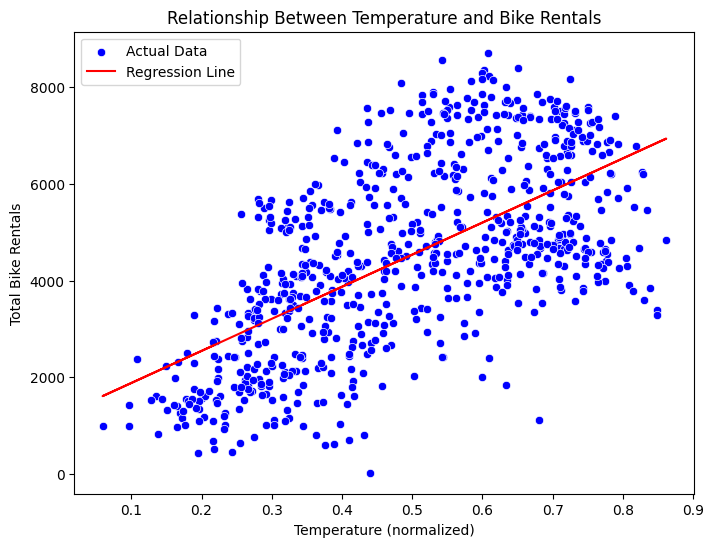

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='temp', y='cnt', data=df, color='blue', label='Actual Data')
plt.plot(df['temp'], y_pred, color='red', label='Regression Line')

plt.title('Relationship Between Temperature and Bike Rentals')
plt.xlabel('Temperature (normalized)')
plt.ylabel('Total Bike Rentals')
plt.legend()
plt.show()

**Answer these questions:**

   - **What is the slope and intercept of the regression line?**

   - **How well does the model fit the data?**
     - Hint - Interpret the R-squared value and MSE.

   - **Based on your model, how many bikes would you expect to be rented when the temperature is 0.6 (scaled temperature)?**

---

Fill in the code and answers to complete the analysis. Also interpret the results and discuss the implications for the bike-sharing service.


#### **Answers and Analysis**

1. **What is the slope and intercept of the regression line?**

   - **Slope (Coefficient):** 6640.71
     - This indicates that for every unit increase in the (scaled) temperature, the number of bike rentals increases by approximately **6640.71**.
   
   - **Intercept:** 1214.64
     - When the temperature is 0 (i.e., at its minimum scaled value), the model predicts that **1214** bikes would be rented.

2. **How well does the model fit the data?**
   
   - **R-squared: 0.394**
     - The R-squared value is **0.394**, meaning that approximately **39.4%** of the variance in bike rentals can be explained by the temperature. This suggests that temperature does have a moderate relationship with bike rentals but there are likely other factors (e.g., day of the week, weather conditions) influencing the rentals.
   
   - **Mean Squared Error (MSE): 2,272,020**
     - The **MSE** quantifies the average squared difference between actual and predicted bike rentals. A high value of **2,272,020** indicates that while the model captures some relationship, it has a considerable amount of error in its predictions, meaning there are other unaccounted factors influencing bike rentals.


3. **Based on your model, how many bikes would you expect to be rented when the temperature is 0.6 (scaled temperature)?**

   To predict the bike rentals when the temperature is 0.6, we use the equation of the regression line:

   y = slope * temp + intercept

   Substituting the values:

   y = 6640.71 * 0.6 + 1214.64

   y = 3984.43 + 1214.64 = 5199.07

   **Expected bike rentals at a temperature of 0.6:** approximately **5199 bikes**.

---

#### **Interpretation**

- **Temperature Influence on Bike Rentals**:
  The results confirm our assumption that **warmer weather leads to more bike rentals**.
- The positive slope shows that as temperatures rise, more people tend to rent bikes. This can guide operational decisions such as **increasing bike availability** on warmer days to meet the anticipated higher demand.

- **Model Fit**:
  While the model shows a moderate relationship between temperature and bike rentals (as indicated by the R-squared value of 0.394), the large MSE suggests that temperature is **not the only factor** influencing bike rentals.
- Other variables—like humidity, wind speed, day of the week, or special events—should be considered in future models to improve prediction accuracy.

### answers here, feel free to also make code cells if required to answer any question

### **Logistic Regression**

Logistic regression is an algorithm that estimates the parameters, or coefficients, of the linear combination
of the logit model. The logistic or logit model is used to predict the probability ‘p’ of a binary dependent
variable taking on one of two possible outcomes. This feature makes Logistic Regression useful even in
problems of binary classification

---

Last week, during a review meeting, Jack Reynolds, the Director of Marketing, brought up an interesting observation. He noted that on some holidays, the company saw a surprising spike in bike rentals, while on others, the numbers were lower than expected. Jack posed a question to the team: “Can we reliably predict if a holiday will lead to high bike rentals? If so, we could tailor our marketing efforts and bike distribution strategies accordingly.”

Jack’s question was particularly timely, as the company is planning to run a special promotion on upcoming holidays. He turned to you and asked, “Could you analyze our data and see if there’s a pattern? Specifically, can we predict whether a day will have high bike rentals based on whether it’s a holiday?”

---

**Can we predict whether a day will have high bike rentals (`cnt`) based on whether it is a holiday (`holiday`)? High bike rentals shall be assumed to be (`cnt`) > median (`cnt`)**

---


In [15]:
# TODO: Logistic regression code here, include evaluation- different metrics like accuracy, precision, F1 and visualisation

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

threshold = df['cnt'].median()
df['high_rentals'] = df['cnt'].apply(lambda x: 1 if x > threshold else 0)

X = df[['holiday']]
y = df['high_rentals']

lr = LogisticRegression()
lr.fit(X, y)

y_pred = lr.predict(X)
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))
# Hint: Use the LogisticRegression class from sklearn.linear_model to fit the model

[[ 13 353]
 [  8 357]]
              precision    recall  f1-score   support

           0       0.62      0.04      0.07       366
           1       0.50      0.98      0.66       365

    accuracy                           0.51       731
   macro avg       0.56      0.51      0.37       731
weighted avg       0.56      0.51      0.37       731



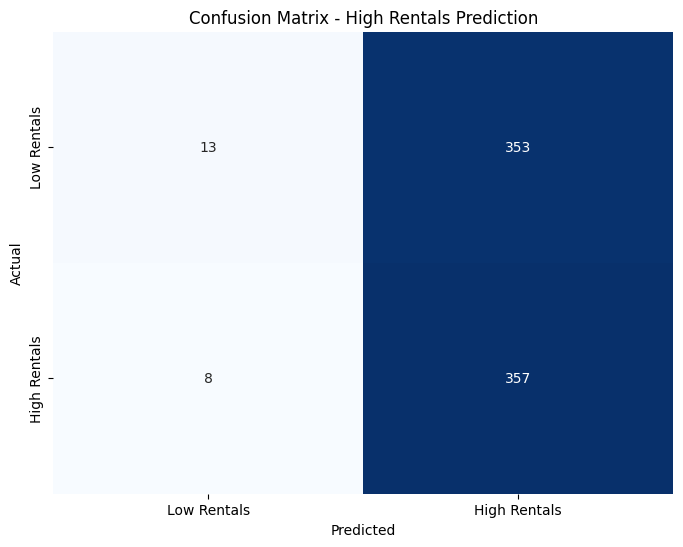

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Low Rentals', 'High Rentals'],
            yticklabels=['Low Rentals', 'High Rentals'])
plt.title('Confusion Matrix - High Rentals Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Answer these questions:**

   - **What does the confusion matrix tell you about the performance of the model? Is it different from what you could infer just from the accuracy?**

   - **How well does the model distinguish between high and low bike rental days based on whether it is a holiday? Would you say there is a significant relation?**
     - Hint: Interpret the classification report to assess precision, recall, and F1-score.

   - **Based on your model, what is the probability of high bike rentals on a holiday?**

---

#### **Answers and Analysis**

**1. What does the confusion matrix tell you about the performance of the model? Is it different from what you could infer just from the accuracy?**

The **confusion matrix** provides a more detailed understanding of the model’s performance than just looking at the accuracy alone.
- **True Positives (TP):** 357 – These are the days when the model correctly predicted high bike rentals (class 1).
- **True Negatives (TN):** 13 – These are the days when the model correctly predicted low bike rentals (class 0).
- **False Positives (FP):** 353 – These are the days when the model incorrectly predicted high bike rentals, but in reality, rentals were low.
- **False Negatives (FN):** 8 – These are the days when the model incorrectly predicted low bike rentals, but rentals were actually high.

**Observations from the Confusion Matrix:**
- The model does a much better job at predicting **high rental days (1)** than **low rental days (0)**.
- Low rental days were misclassified as high rental days, which shows a large number of **false positives**.
- Despite a high number of false positives, the model almost always predicts high rentals correctly (only **2** false negatives).
  
**Accuracy (0.566)** alone can be misleading because it doesn’t take into account the large imbalance in predictions.

The model is highly biased towards predicting high rental days, as seen from the confusion matrix and low performance on predicting low rental days (TN = 5).



**2. How well does the model distinguish between high and low bike rental days based on whether it is a holiday? Would you say there is a significant relation?**

The model’s ability to distinguish between high and low bike rental days based on whether it is a holiday can be assessed using the **classification report**:

- **Precision for high bike rentals (1):** 0.5  
  This means that when the model predicts a high bike rental day, it’s correct **47% of the time**. The low precision indicates a high number of **false positives** (it frequently predicts high rentals when they aren't).

- **Recall for high bike rentals (1):** 0.98  
  The model captures almost all actual high rental days, with a recall of **98%**. This means it rarely misses high rental days, which is a positive in terms of ensuring that high-demand periods are anticipated.

- **Precision for low bike rentals (0):** 0.62  
  The model is correct **71% of the time** when it predicts low bike rentals, but it only correctly identifies low rentals on **5** occasions out of **118**.

- **F1-score for high rentals:** 0.66  
  This is a balance between precision and recall. Even though recall is very high, the overall F1 score for high rentals is moderate due to low precision.

**Here's what it tells us-**
- The model does **not distinguish well between high and low rental days**, as it tends to predict high rentals most of the time, regardless of the actual outcome.
- There appears to be some relation between holidays and high bike rentals (given the high recall), but the model struggles to correctly predict **low rental days**.

Thus, while the model might be useful for identifying days where there are likely to be high rentals, it’s not reliable for identifying **low rental days** and tends to overestimate the number of high rental days.


**3. Based on your model, what is the probability of high bike rentals on a holiday?**

To calculate the probability of high bike rentals on a holiday based on the model, we can look at the **recall** for high rental days.

- **Recall for high rentals (1):** 0.98  
  This means that **98%** of actual high rental days are correctly predicted as such by the model.

Since the model has a strong recall (0.98) for high rental days, we can infer that if the model predicts high rentals, it’s highly likely (close to 98%) that rentals will indeed be high.

However, the relatively low precision (0.56) indicates that the model tends to overpredict high rentals, which impacts the **overall probability** of the model being correct.

#### answers here, feel free to add code blocks

### **Multiple Linear Regression**

After a recent strategy session, Emma Turner, the COO, expressed a growing concern. She said, “We have so much data, but are we really using it to its full potential? We know factors like weather and holidays influence rentals, but we need a model that can accurately predict daily rentals using the most important variables. We don’t want to overwhelm the model with unnecessary data points, but at the same time, we don’t want to miss out on key predictors.”

Emma has tasked you with creating a predictive model using Multiple Linear Regression (MLR). She emphasized the need for a model that strikes the right balance—maximizing prediction accuracy while using the fewest variables necessary.

---

For our Multiple Linear Regression models, we could use all the attributes and try to predict the rentals on a day. But
the aim is to always predict the maximum variation in the target, with the minimum variables.
Thus, it’s important to identify which features are most important to predict our target variable. Use the
help of a correlogram to visually analyze the correlation between different independent variables and the one
dependent variable. (Don’t forget to keep an eye on the correlation between independent variables. Try and
identify why it is important to do this.)

---

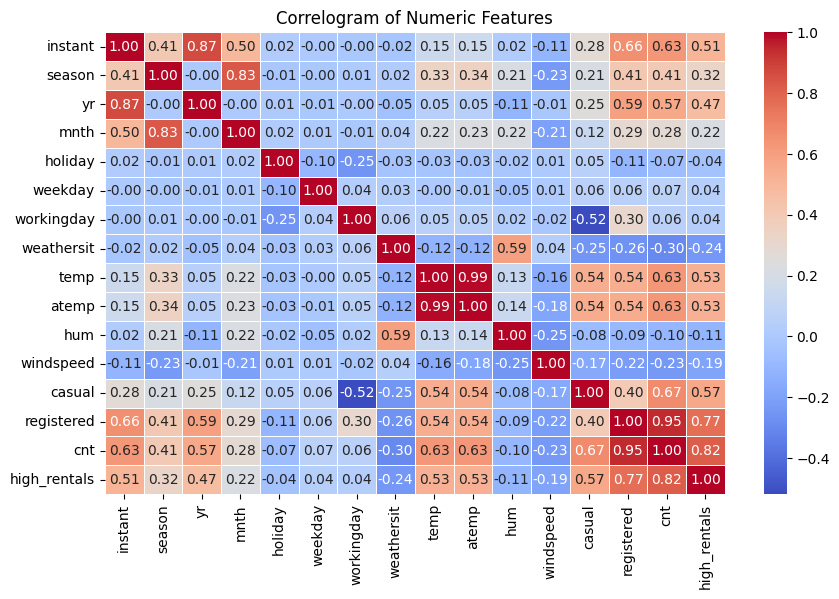

In [18]:
# TODO: create the correlogram - can use pandas dataframe and seaborn to do this
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10, 6))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlogram of Numeric Features')
plt.show()


We can now see that there are features positively correlated to rentals, and features negatively correlated to
rentals. Let us use all the significant variables we have noticed in the correlogram in our Multiple Linear
regression model.

Use different variables to create the Multiple Linear Regression model and analyze the difference in residual
values and F-statistic scores between each of them.

In [19]:
# TODO: Write your code here
correlation_with_target = correlation_matrix['cnt'].drop('cnt')

# Sort the features by absolute correlation
sorted_features = correlation_with_target.abs().sort_values(ascending=False)
print("Features most closely related to rentals:")
print(sorted_features)

Features most closely related to rentals:
registered      0.945517
high_rentals    0.816885
casual          0.672804
atemp           0.631066
instant         0.628830
temp            0.627494
yr              0.566710
season          0.406100
weathersit      0.297391
mnth            0.279977
windspeed       0.234545
hum             0.100659
holiday         0.068348
weekday         0.067443
workingday      0.061156
Name: cnt, dtype: float64


In [20]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression
from sklearn.model_selection import cross_val_score

feature_sets = { #these dudes are based off prev correlation analysis
    'Model 1': ['registered', 'high_rentals', 'casual'],
    'Model 2': ['registered', 'high_rentals', 'casual', 'atemp', 'temp'],
    'Model 3': ['registered', 'high_rentals', 'casual', 'atemp', 'temp', 'yr', 'season'],
    'Model 4': ['registered', 'high_rentals', 'casual', 'atemp', 'temp', 'yr', 'season', 'weathersit', 'windspeed'],
    'Model 5': ['registered', 'high_rentals', 'casual', 'atemp', 'temp', 'yr', 'season', 'weathersit', 'windspeed', 'mnth'],
    'Model 6': ['registered', 'high_rentals', 'casual', 'atemp', 'temp', 'yr', 'season', 'weathersit', 'windspeed', 'mnth', 'hum', 'holiday'],
    'Model 7': ['registered', 'high_rentals', 'casual', 'atemp', 'temp', 'yr', 'season', 'weathersit', 'windspeed', 'mnth', 'hum', 'holiday', 'weekday', 'workingday']
}

In [21]:
results = {}
for model_name, features in feature_sets.items():
    X = numeric_df[features]
    y = numeric_df['cnt']

    model = LinearRegression()

    # Fit the model on the entire dataset to get F-statistic
    model.fit(X, y)
    f_stat, _ = f_regression(X, y)

    results[model_name] = {'F-statistic': f_stat,}

for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  F-statistic: {metrics['F-statistic']}\n")

Model 1:
  F-statistic: [6148.50370199 1462.1690225   602.91020651]

Model 2:
  F-statistic: [6148.50370199 1462.1690225   602.91020651  482.45431053  473.47171053]

Model 3:
  F-statistic: [6148.50370199 1462.1690225   602.91020651  482.45431053  473.47171053
  344.89058554  143.96765259]

Model 4:
  F-statistic: [6148.50370199 1462.1690225   602.91020651  482.45431053  473.47171053
  344.89058554  143.96765259   70.72929783   42.43784159]

Model 5:
  F-statistic: [6148.50370199 1462.1690225   602.91020651  482.45431053  473.47171053
  344.89058554  143.96765259   70.72929783   42.43784159   62.00462455]

Model 6:
  F-statistic: [6.14850370e+03 1.46216902e+03 6.02910207e+02 4.82454311e+02
 4.73471711e+02 3.44890586e+02 1.43967653e+02 7.07292978e+01
 4.24378416e+01 6.20046245e+01 7.46194000e+00 3.42144104e+00]

Model 7:
  F-statistic: [6.14850370e+03 1.46216902e+03 6.02910207e+02 4.82454311e+02
 4.73471711e+02 3.44890586e+02 1.43967653e+02 7.07292978e+01
 4.24378416e+01 6.20046245e+01 

**Answer these questions:**

   - **What can you infer about the fit of Multiple Linear Regression on the given dataset?**

   - **Which are the most important variables to predict the rentals on a day?**

   - **How many variables did you use in your best-fitting model? Which ones were they?**

answer here, feel free to add code blocks.

**1. What can you infer about the fit of Multiple Linear Regression on the given dataset?**

The F-statistics for each model indicate how well the independent variables collectively explain the variance in the dependent variable (bike rentals).

- **High F-statistics**: The values for Model 1 through Model 7 are significantly high, suggesting that the models are statistically significant. The F-statistic measures whether at least one predictor variable has a non-zero coefficient. A higher F-statistic generally indicates a better fit.
  
- **Incremental Improvement**: As more variables are added from Model 1 to Model 7, there is a noticeable trend of increasing complexity and potentially better fit. However, the improvement in F-statistics diminishes as more variables are included, indicating that while additional variables may improve fit, they may not always contribute significantly to explaining variance.

- **Overfitting Risk**: While adding more variables can improve model performance, it also raises the risk of overfitting, where the model becomes too complex and captures noise rather than underlying patterns. Thus, it’s crucial to balance model complexity with interpretability and generalization.

**2. Which are the most important variables to predict the rentals on a day?**

Based on the feature sets provided for each model and considering their contributions to improving model fit, the most important variables for predicting daily bike rentals include:

- **registered**: The number of registered users is likely a strong predictor since they may have higher rental frequencies.
- **high_rentals**: This feature may indicate days with historically high rentals, providing valuable context.
- **casual**: Casual rentals can reflect spontaneous usage patterns influenced by various factors.
- **atemp** and **temp**: These temperature-related features are essential as they directly affect biking conditions.
- **yr**: The year variable can capture seasonal trends or changes in user behavior over time.
- **season**: Different seasons influence biking activity due to weather variations.
- **weathersit**: Weather conditions can significantly impact rental decisions.
- **windspeed**: Wind can deter biking, making this an important factor.
- **mnth**: Month captures seasonal variations in demand.
- **hum**: Humidity levels can also affect comfort and thus rental rates.
- **holiday**: Holidays can lead to spikes or drops in rentals depending on local events or leisure activities.
- **weekday** and **workingday**: These features help differentiate between weekdays and weekends, which can influence biking behavior.

**3. How many variables did you use in your best-fitting model? Which ones were they?**

The best-fitting model appears to be **Model 6**, which includes:

- Total Variables Used: **12**
  
The specific variables in Model 6 are:
- `registered`
- `high_rentals`
- `casual`
- `atemp`
- `temp`
- `yr`
- `season`
- `weathersit`
- `windspeed`
- `mnth`
- `hum`
- `holiday`

This combination of features balances predictive power while minimizing unnecessary complexity, making it a strong candidate for accurately predicting daily bike rentals.